# Time Series Forecasting

#### A time series is simply a series of data points ordered in time . In a time series ,time is often the independent variable and goal is to make forcaste for the future

# Goals:
    1)To indentify the nature of the phenomenon repressented by the sequence   of operations.
    2) Forescasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
data=pd.read_csv("AirPassengers.csv")
print(data.head(), end="\n \n")
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
 
Month          object
#Passengers     int64
dtype: object


__As the Month is not in the time format we"ll convert it into time format__

In [3]:
dateparse= lambda dates : pd.datetime.strptime(dates ,"%Y-%m")
#dateparse('1962-01')

data=pd.read_csv('AirPassengers.csv', parse_dates=["Month"] , index_col="Month"
                ,date_parser=dateparse)
data.head()

C:\Users\SRJ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
#check datatype of index

data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
ts=data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

__Indexing TS arrays :__

In [7]:
# 1. Specific the index as a string constant:

ts["1949-01-01"]

112

In [8]:
# 2. Import datetime library and use 'datetime' function:

from datetime import datetime
ts[datetime(1949,1,1)]

112

___Get Range:___

In [9]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [10]:
# All the rows of 1949:
ts["1949"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Checking for Stationarity

## Plot the Time-series

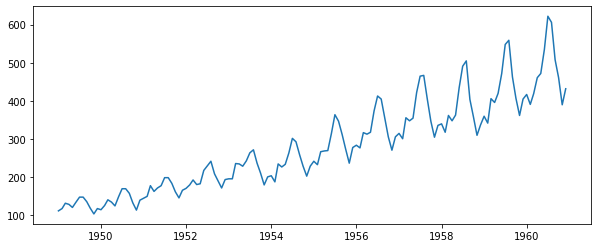

In [11]:
plt.figure(figsize=(10,4))
plt.plot(ts)

# Stationarity:
 __1) A time series is said to be stationary if its statistical properties such as mean , variance remain constant over time.__
 
 __2) Most of the Time Series models work on the assumption that the TS is stationary . Major reason for this is that there are many ways in which a series can be non-stationary , but only one way for stationarity.__
 
 __3) Intuitively , we can say that if a Time Series has a paricular behavior obver time ,there is a very high probability that it will follow same in the future.__
 
__4) Also ,the theories realted to stationay are more matue and easier to implement as compared to non-stationary series.__
   

# __#Function for testing stationarity__

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # determinine the rolling statistics
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    
    plt.figure(figsize=(12,5))
    orig=plt.plot(timeseries ,color="blue" ,label="Original")
    mean=plt.plot(rolmean ,color="red" ,label="Rolling Mean")
    std=plt.plot(rolstd ,color="black" ,label="Rolling std")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard deviation")
    plt.show(block=False)
    
    #Perform dickey-Fuller test:
    print("Result of dickey-Fuller test:")
    dftest=adfuller(timeseries ,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4] ,index=["Test Statistic" ,"P-value" ,"#Lags Used " ,"Number of Observation Used"])
    
    for key, value in dftest[4].items():
        dfoutput["Critical Value  (%s)"%key] = value
    print(dfoutput)

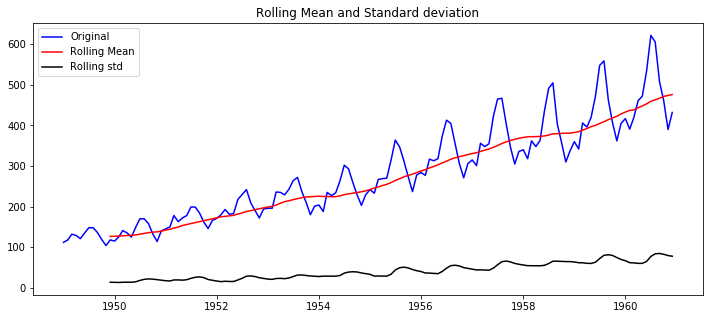

Result of dickey-Fuller test:
Test Statistic                  0.815369
P-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value  (1%)           -3.481682
Critical Value  (5%)           -2.884042
Critical Value  (10%)          -2.578770
dtype: float64


In [13]:
test_stationarity(ts)

# Making TS Stationary

## Estimating And Eliminating Trend

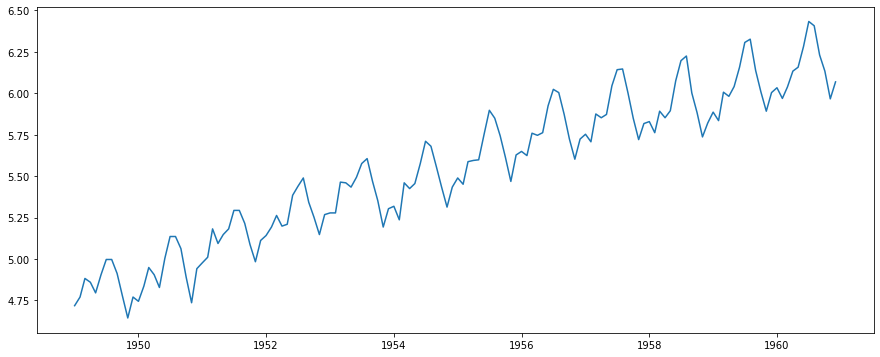

In [14]:
ts_log=np.log(ts)
plt.plot(ts_log)

# Smoothing:

## Moving Average

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps.

The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

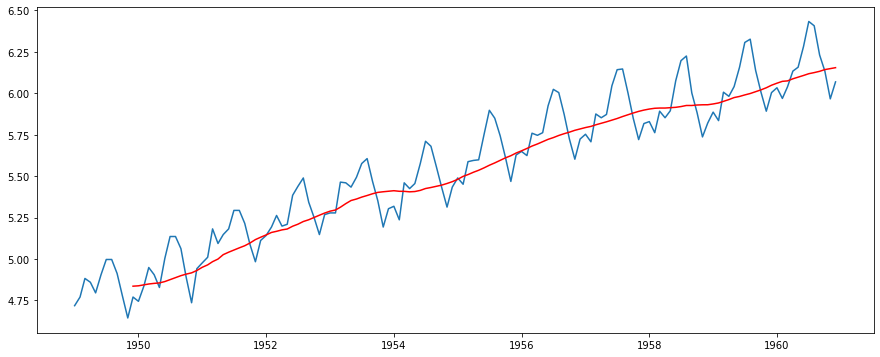

In [15]:
moving_avg=ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg ,color="r")

In [16]:
ts_log_moving_avg_diff= ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [17]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

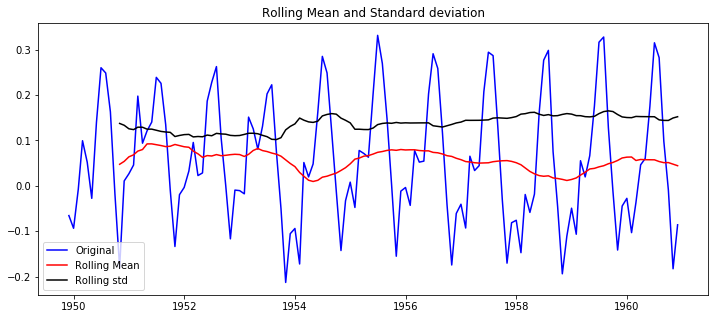

Result of dickey-Fuller test:
Test Statistic                 -3.162908
P-value                         0.022235
#Lags Used                     13.000000
Number of Observation Used    119.000000
Critical Value  (1%)           -3.486535
Critical Value  (5%)           -2.886151
Critical Value  (10%)          -2.579896
dtype: float64


In [18]:
test_stationarity(ts_log_moving_avg_diff)

Here we can see that the moving average helps in reducing the p-value by reducing noise

# Exponentially Weighted Moving Average

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

The Formula for EMA Is

​	  
EMA 
Today
​	 =
​	  
(Value 
Today
​	 ∗( 
1+Days
Smoothing
​	 ))
+EMA 
Yesterday
​	 ∗(1−( 
1+Days
Smoothing
​	 ))
​	 

where:
EMA=Exponential moving average
​	

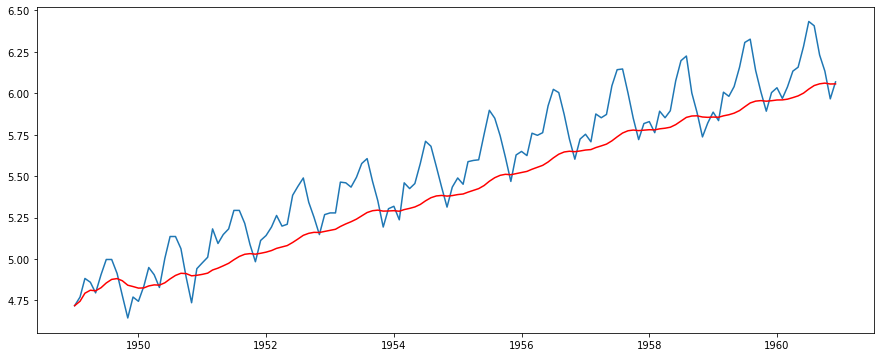

In [19]:
expweighted_avg= ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg , color="r")
#expweighted_avg.plot(style="k--")
#df.ewm(com=0.5 ).mean()

In [20]:
expweighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: #Passengers, Length: 144, dtype: float64

In [21]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

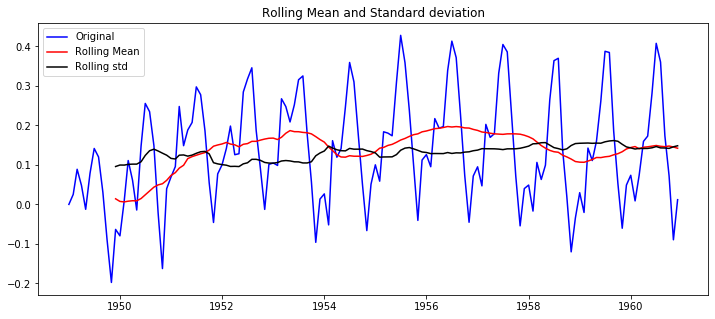

Result of dickey-Fuller test:
Test Statistic                 -3.601262
P-value                         0.005737
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value  (1%)           -3.481682
Critical Value  (5%)           -2.884042
Critical Value  (10%)          -2.578770
dtype: float64


In [22]:
ts_log_ewma_diff=ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

we can see that smoothing has reduced p-value

# Eliminating Trend And Seasonality

## Differencing

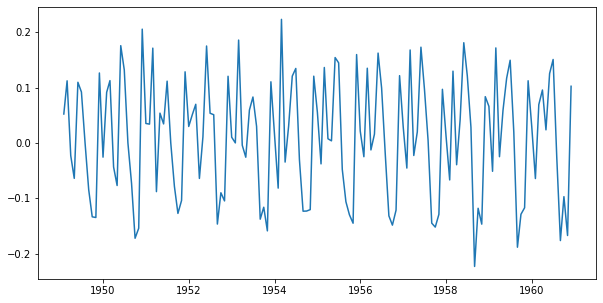

In [23]:
#Take first differences:
plt.figure(figsize=(10,5))
ts_log_diff= ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [24]:
ts_log.shift()

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: #Passengers, Length: 144, dtype: float64

<Figure size 864x432 with 0 Axes>

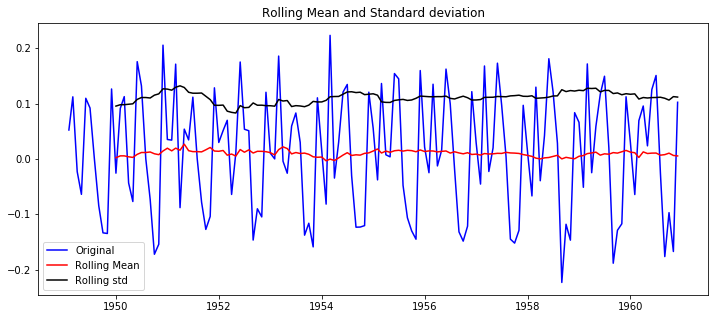

Result of dickey-Fuller test:
Test Statistic                 -2.717131
P-value                         0.071121
#Lags Used                     14.000000
Number of Observation Used    128.000000
Critical Value  (1%)           -3.482501
Critical Value  (5%)           -2.884398
Critical Value  (10%)          -2.578960
dtype: float64


In [25]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposition

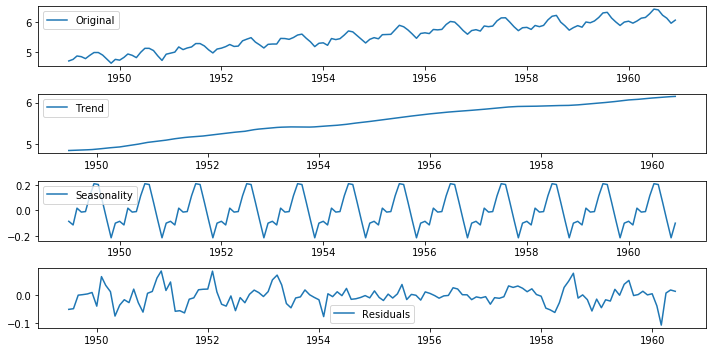

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

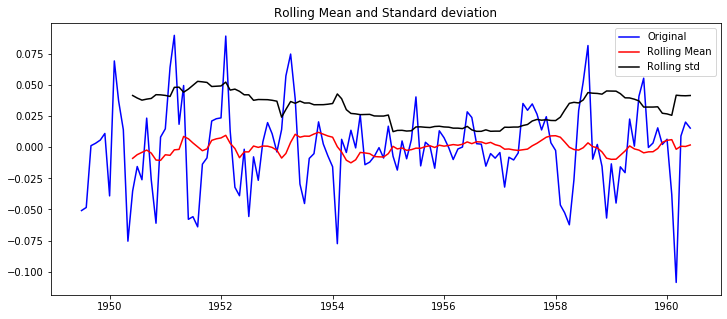

Result of dickey-Fuller test:
Test Statistic               -6.332387e+00
P-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value  (1%)         -3.485122e+00
Critical Value  (5%)         -2.885538e+00
Critical Value  (10%)        -2.579569e+00
dtype: float64


In [27]:
plt.figure(figsize=(12,5))
ts_log_decompose =residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final forecasting

## Auto Regressive Integrated Moving Average (ARIMA)

In [28]:
from statsmodels.tsa.arima_model import ARIMA

## ACF & PACF plots

C:\Users\SRJ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


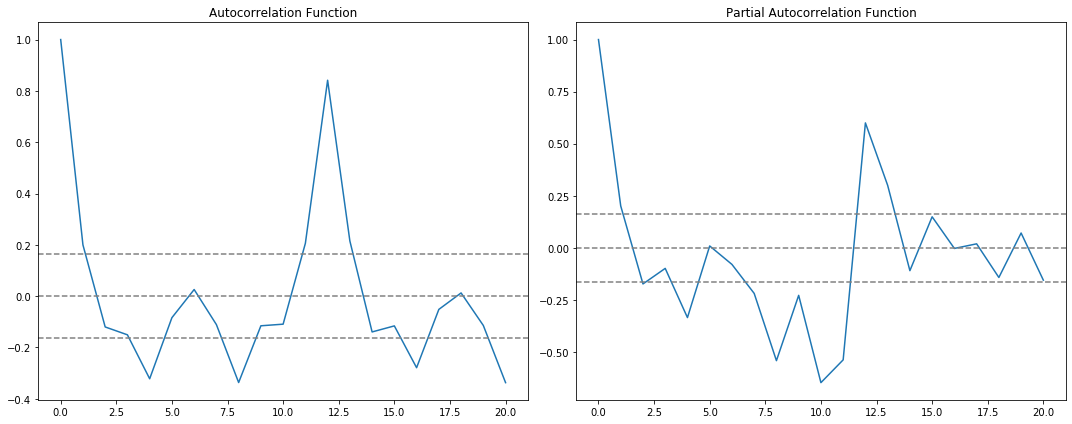

In [29]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:  
#plt.figure(figsize=(10,5))
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
#plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# AR model

C:\Users\SRJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SRJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

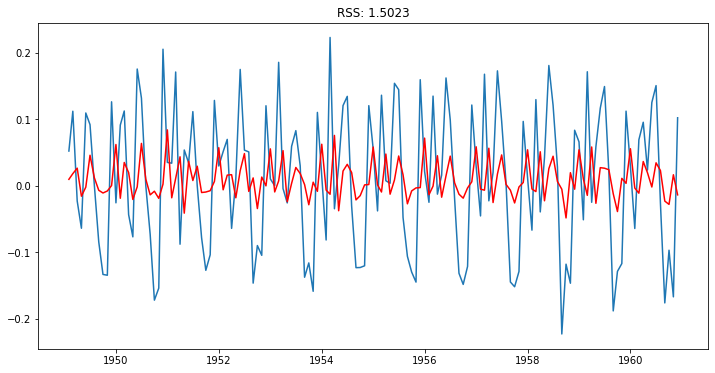

In [30]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA model

model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# ARIMA model

C:\Users\SRJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SRJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

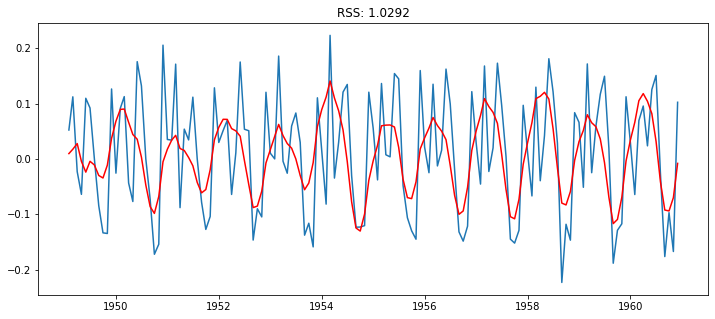

In [31]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Convert to original scale

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [34]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [35]:
predictions_ARIMA_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
dtype: float64

In [36]:
ts_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

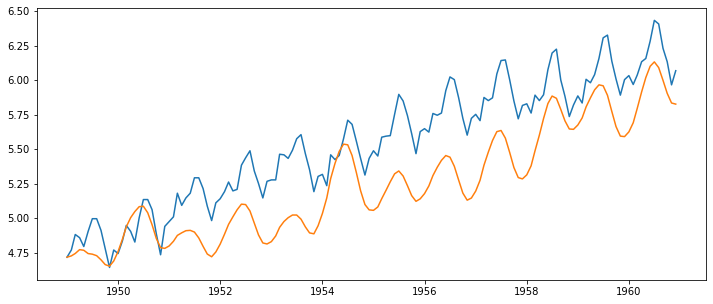

In [37]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 90.1044')

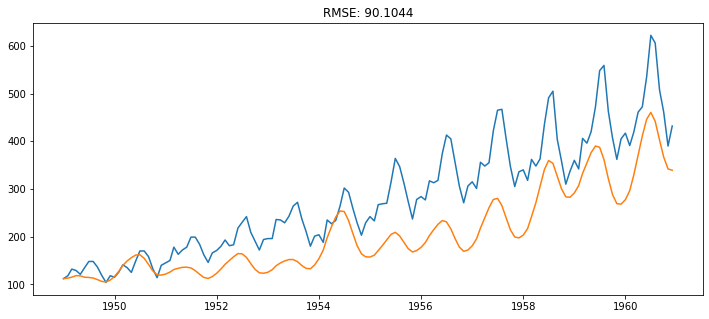

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [39]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301987
1949-05-01    117.768364
                 ...    
1960-08-01    441.886507
1960-09-01    402.905963
1960-10-01    366.753540
1960-11-01    341.984837
1960-12-01    339.216839
Length: 144, dtype: float64

In [40]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


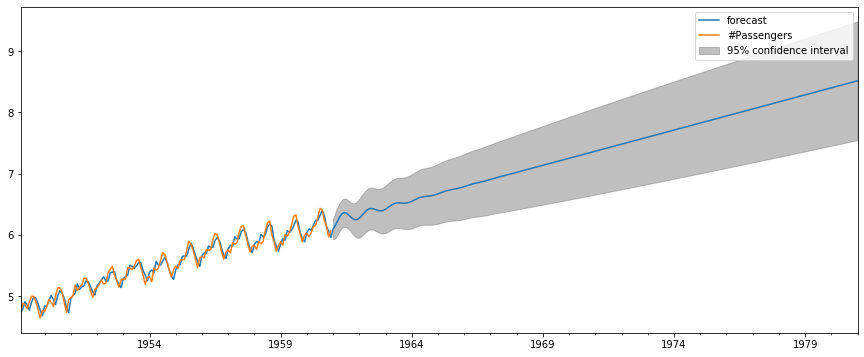

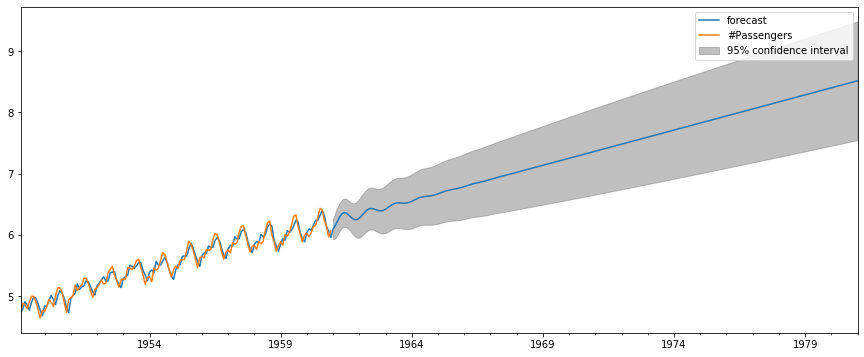

In [41]:
results_ARIMA.plot_predict(1,384)

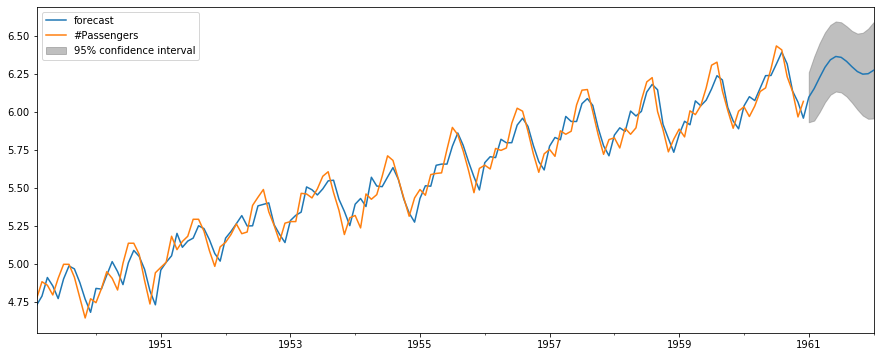

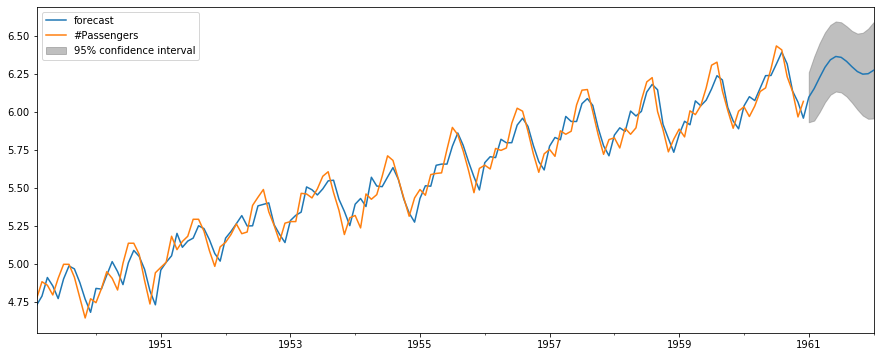

In [42]:
results_ARIMA.plot_predict(1,156)

In [43]:

x=results_ARIMA.forecast(steps=156)
x

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91